# 서울시 평균 기온 예측 해커톤

# 데이터 읽어오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib import font_manager, rc
font_path = "c:\WINDOWS\Fonts\GULIM.TTC"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
plt.rc('font', size=8) 
warnings.filterwarnings('ignore')


df=pd.read_csv(r'C:\Users\hyssk\AICE_\Predict_Temperature\train.csv')
df

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,1960-01-01,2.2,-5.2,7.4,NaN,68.3,1.7,6.7,NaN,NaN,-1.6
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,NaN,NaN,-1.9
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,NaN,NaN,4.0
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,NaN,NaN,7.5
4,1960-01-05,1.3,-8.2,9.5,NaN,44.0,5.1,8.2,NaN,NaN,-4.6
...,...,...,...,...,...,...,...,...,...,...,...
23006,2022-12-27,3.3,-7.3,10.6,NaN,69.8,1.8,8.8,10.25,91.7,-2.6
23007,2022-12-28,0.1,-6.0,6.1,0.1,58.1,2.5,8.7,10.86,90.6,-3.3
23008,2022-12-29,2.1,-7.8,9.9,0.0,56.3,1.7,9.0,10.88,93.8,-2.9
23009,2022-12-30,2.3,-4.4,6.7,0.0,65.6,1.9,7.9,10.84,82.3,-1.8


23011개의 정보와 11개의 칼럼이 존재한다.

NaN 값 (결측치가 보인다.) -> 결측치를 어떻게 처리할 것인가에 대한 고민이 필요 

(dropna를 할 것인가?) 또는 (fillna()를 하는데, 어떤 것으로 fill 채울 것인가?)를 고민할 필요가 있다.

# 몇 개의 결측치가 존재하는가???

In [2]:
df.isnull().sum()

일시          0
최고기온        3
최저기온        3
일교차         4
강수량     13861
평균습도        0
평균풍속        4
일조합       118
일사합      4862
일조율       366
평균기온        0
dtype: int64

예상외로, 강수량의 결측치가 너무 많다. 50퍼가 넘는 수치가 NaN값이니 강수량의 칼럼을 삭제할 필요성이 있어보이지만, 아직 결정 짓지는 말자.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23011 entries, 0 to 23010
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      23011 non-null  object 
 1   최고기온    23008 non-null  float64
 2   최저기온    23008 non-null  float64
 3   일교차     23007 non-null  float64
 4   강수량     9150 non-null   float64
 5   평균습도    23011 non-null  float64
 6   평균풍속    23007 non-null  float64
 7   일조합     22893 non-null  float64
 8   일사합     18149 non-null  float64
 9   일조율     22645 non-null  float64
 10  평균기온    23011 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.9+ MB


일시가 유일한 Object (범주형)이다. 연도별로 qcut이나 cut을 사용해서 구간을 나누고 싶다.

그리고 datetime을 이용해서 일시(칼럼)에 대한 어떤 전처리가 필요해보인다.

In [4]:
df['일시'] = pd.to_datetime(df['일시'])
df

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,1960-01-01,2.2,-5.2,7.4,NaN,68.3,1.7,6.7,NaN,NaN,-1.6
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,NaN,NaN,-1.9
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,NaN,NaN,4.0
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,NaN,NaN,7.5
4,1960-01-05,1.3,-8.2,9.5,NaN,44.0,5.1,8.2,NaN,NaN,-4.6
...,...,...,...,...,...,...,...,...,...,...,...
23006,2022-12-27,3.3,-7.3,10.6,NaN,69.8,1.8,8.8,10.25,91.7,-2.6
23007,2022-12-28,0.1,-6.0,6.1,0.1,58.1,2.5,8.7,10.86,90.6,-3.3
23008,2022-12-29,2.1,-7.8,9.9,0.0,56.3,1.7,9.0,10.88,93.8,-2.9
23009,2022-12-30,2.3,-4.4,6.7,0.0,65.6,1.9,7.9,10.84,82.3,-1.8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23011 entries, 0 to 23010
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일시      23011 non-null  datetime64[ns]
 1   최고기온    23008 non-null  float64       
 2   최저기온    23008 non-null  float64       
 3   일교차     23007 non-null  float64       
 4   강수량     9150 non-null   float64       
 5   평균습도    23011 non-null  float64       
 6   평균풍속    23007 non-null  float64       
 7   일조합     22893 non-null  float64       
 8   일사합     18149 non-null  float64       
 9   일조율     22645 non-null  float64       
 10  평균기온    23011 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 1.9 MB


결측치

    최고기온 3 최저기온 3 일교차 4 강수량 13861

    평균습도 0 평균풍속 4 일조합 118 일사합 4862 일조율 366

In [24]:
df_1990s=df[(1990 <= df['일시'].dt.year) & (df['일시'].dt.year < 2000)]
df_2000s=df[(2000 <= df['일시'].dt.year) & (df['일시'].dt.year < 2010)]
df_2010s=df[(2010 <= df['일시'].dt.year) & (df['일시'].dt.year < 2023)]

df_2010s

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합(hr),일사합(MJ/m2),일조율(%),평균기온
18263,2010-01-01,-3.6,-12.7,9.1,NaN,48.0,1.9,7.3,8.63,76.0,-7.6
18264,2010-01-02,0.2,-7.4,7.6,1.4,76.4,2.8,0.8,3.56,8.3,-3.6
18265,2010-01-03,-3.2,-10.5,7.3,NaN,49.3,2.2,8.2,9.95,84.5,-6.8
18266,2010-01-04,-3.4,-8.0,4.6,14.2,84.1,3.0,0.1,2.87,1.0,-5.9
18267,2010-01-05,-7.0,-12.3,5.3,0.0,66.4,2.9,7.5,9.99,77.3,-9.9
...,...,...,...,...,...,...,...,...,...,...,...
23006,2022-12-27,3.3,-7.3,10.6,NaN,69.8,1.8,8.8,10.25,91.7,-2.6
23007,2022-12-28,0.1,-6.0,6.1,0.1,58.1,2.5,8.7,10.86,90.6,-3.3
23008,2022-12-29,2.1,-7.8,9.9,0.0,56.3,1.7,9.0,10.88,93.8,-2.9
23009,2022-12-30,2.3,-4.4,6.7,0.0,65.6,1.9,7.9,10.84,82.3,-1.8


In [13]:
# 칼럼명 변경
df.rename(columns={"일조합":"일조합(hr)",'일사합':'일사합(MJ/m2)','일조율':'일조율(%)'},inplace=True)
df

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합(hr),일사합(MJ/m2),일조율(%),평균기온
11323,1991-01-01,3.2,-4.5,7.7,0.5,72.8,3.1,0.0,0.89,0.0,0.8
11324,1991-01-02,-3.4,-7.9,4.5,NaN,40.5,3.3,8.4,0.97,87.5,-6.1
11325,1991-01-03,-0.4,-9.7,9.3,1.7,65.8,2.7,4.6,1.39,47.9,-6.2
11326,1991-01-04,-5.3,-10.8,5.5,NaN,48.8,3.6,8.1,5.69,84.4,-8.5
11327,1991-01-05,-7.0,-12.8,5.8,NaN,49.3,3.8,8.4,5.88,86.6,-10.1
...,...,...,...,...,...,...,...,...,...,...,...
23006,2022-12-27,3.3,-7.3,10.6,NaN,69.8,1.8,8.8,10.25,91.7,-2.6
23007,2022-12-28,0.1,-6.0,6.1,0.1,58.1,2.5,8.7,10.86,90.6,-3.3
23008,2022-12-29,2.1,-7.8,9.9,0.0,56.3,1.7,9.0,10.88,93.8,-2.9
23009,2022-12-30,2.3,-4.4,6.7,0.0,65.6,1.9,7.9,10.84,82.3,-1.8


# 일변량 칼럼 확인하기

일변량 시각화
- 선 그래프 (시간/순서에 따른 데이터 연속 변화량 관찰)
- 막대 그래프 (범주에 대한 통계 데이터의 양을 막대로 표현)
- 파이 그래프 (전체에 대한 각 부분의 비율)
- 히스토그램 (특정 데이터의 빈도수를 막대 모양으로 표시) (데이터 특성/분포, 빈도, 빈도밀도, 확률)
- 상자 그래프 (수치적 요약 통계 자료를 시각화 : 이상치, 최댓값, 제 3사분위수, 중앙값, 제 1사분위수, 최소값)

출처: AICE Associate 책

In [37]:
df_1990s['일시']

11323   1991-01-01
11324   1991-01-02
11325   1991-01-03
11326   1991-01-04
11327   1991-01-05
           ...    
14605   1999-12-27
14606   1999-12-28
14607   1999-12-29
14608   1999-12-30
14609   1999-12-31
Name: 일시, Length: 3287, dtype: datetime64[ns]

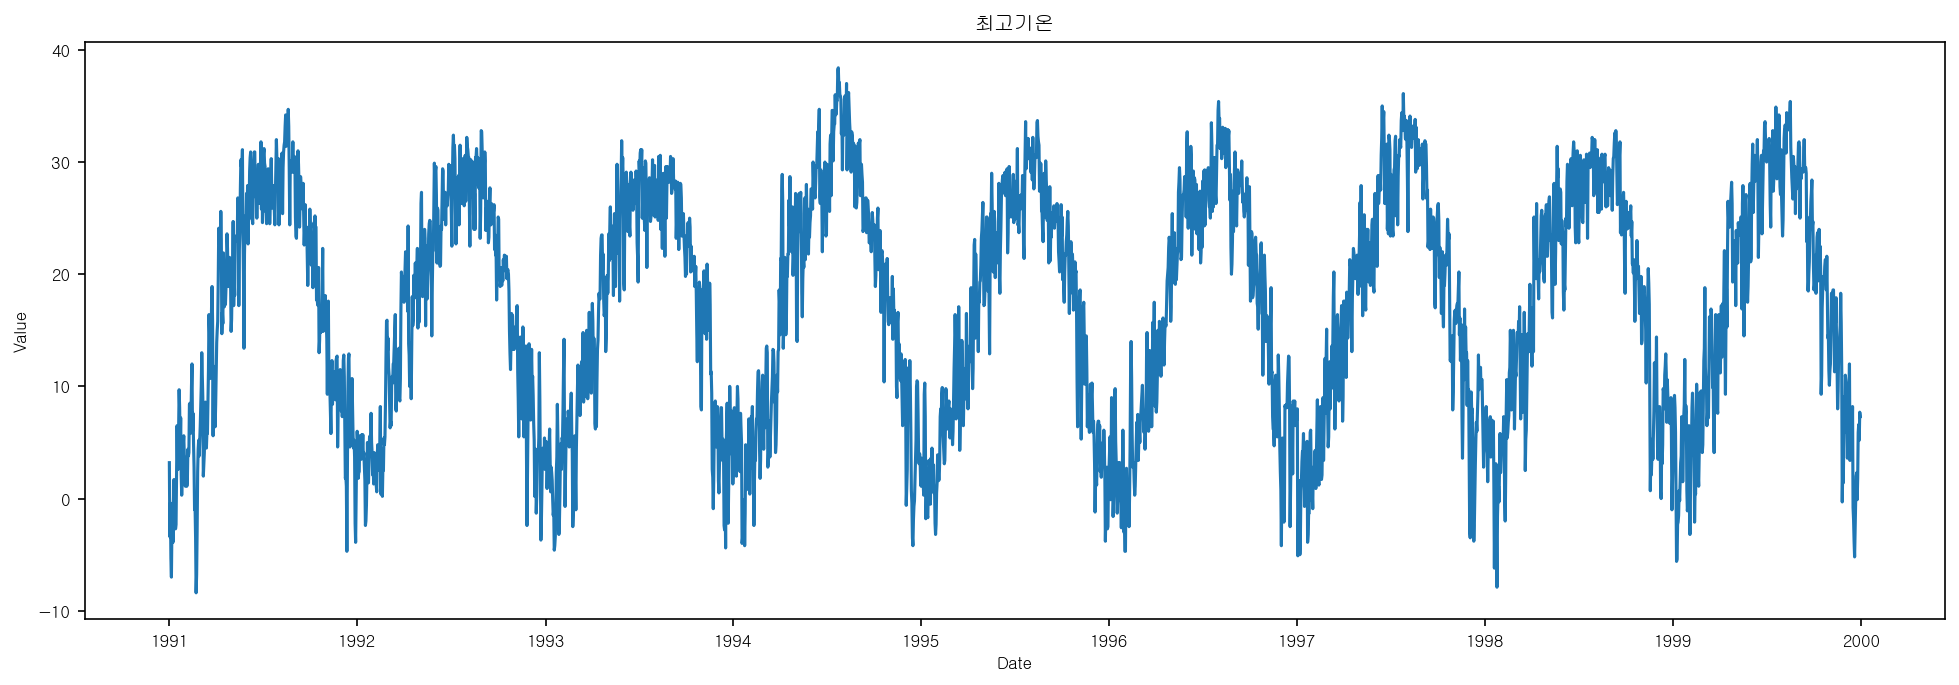

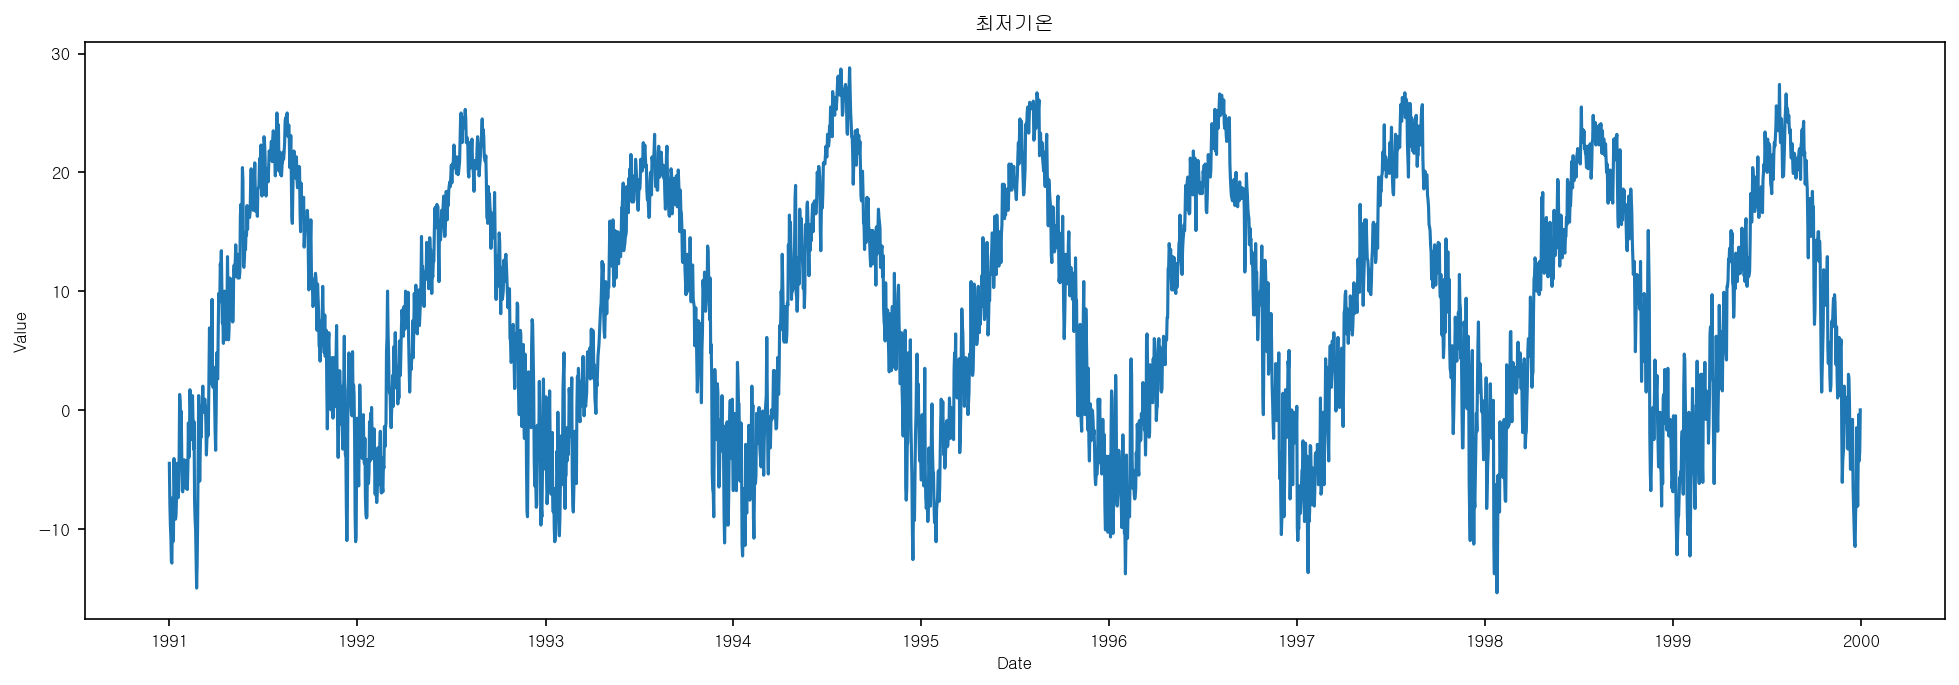

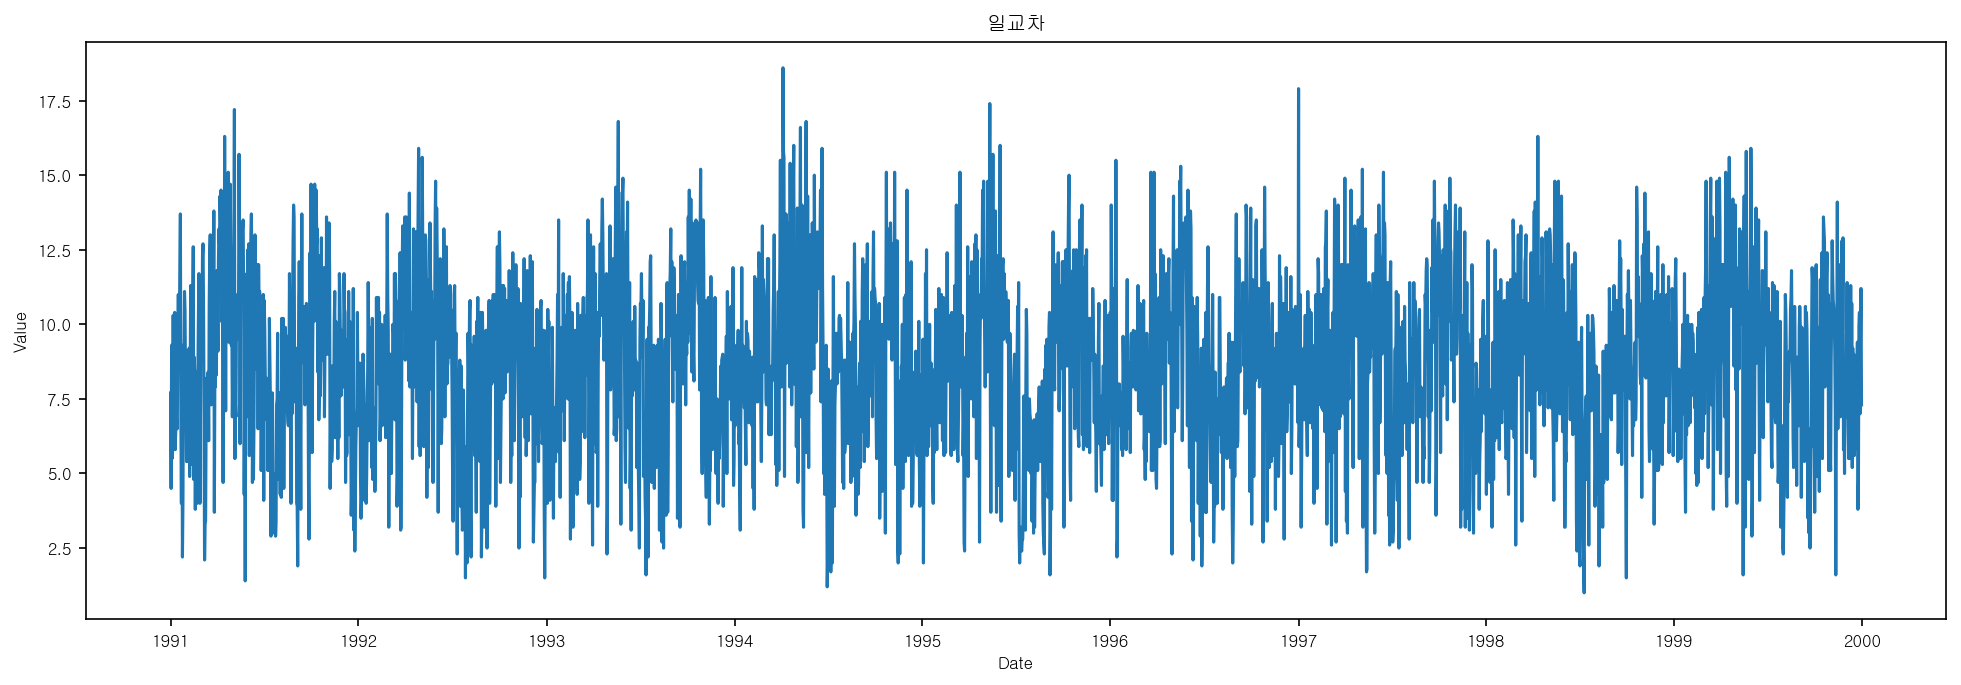

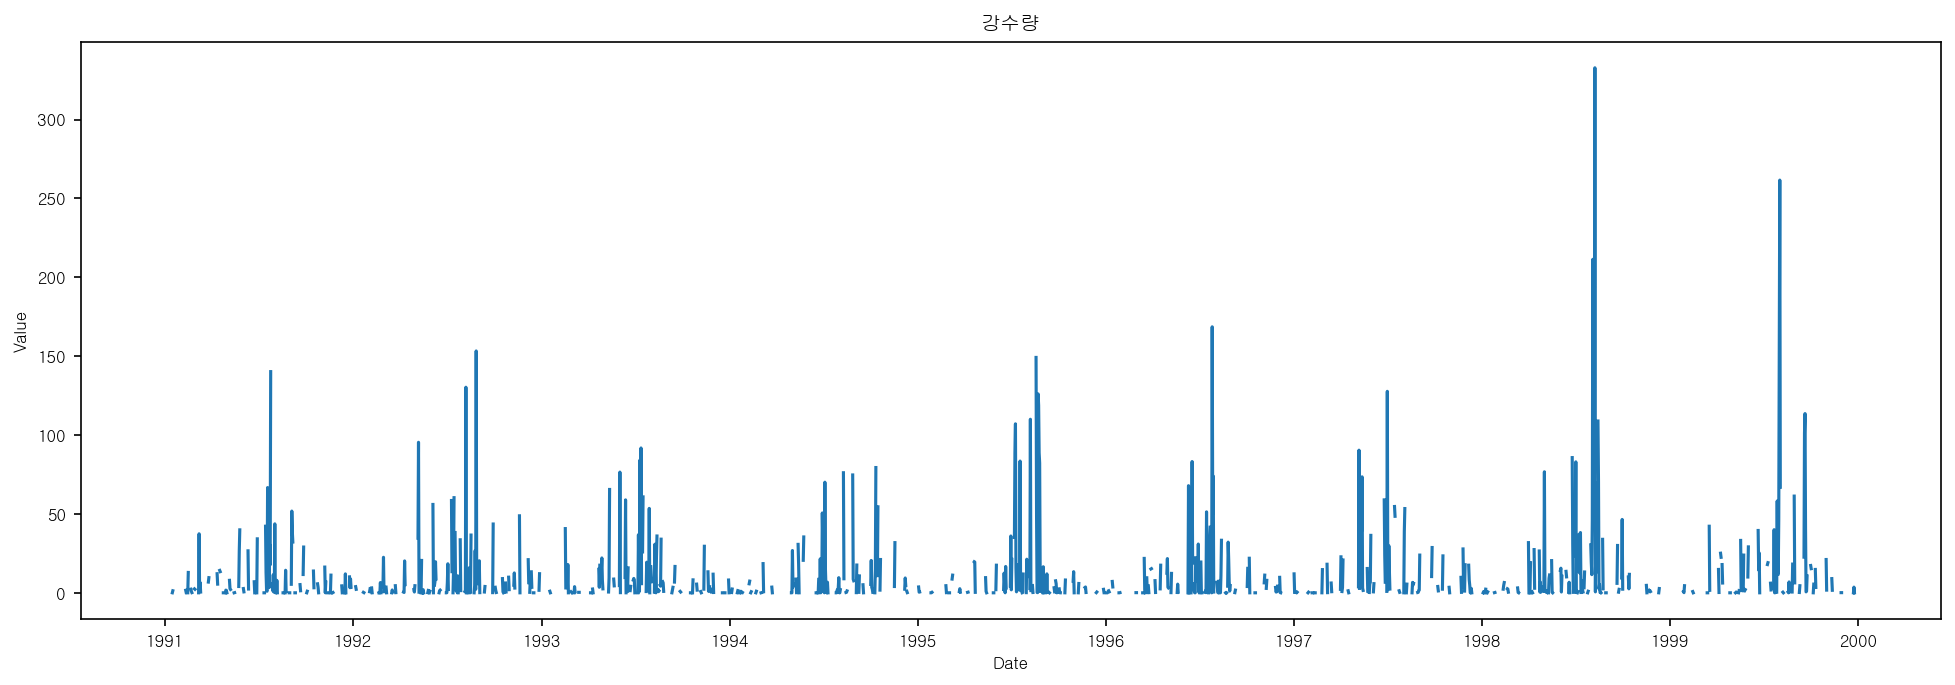

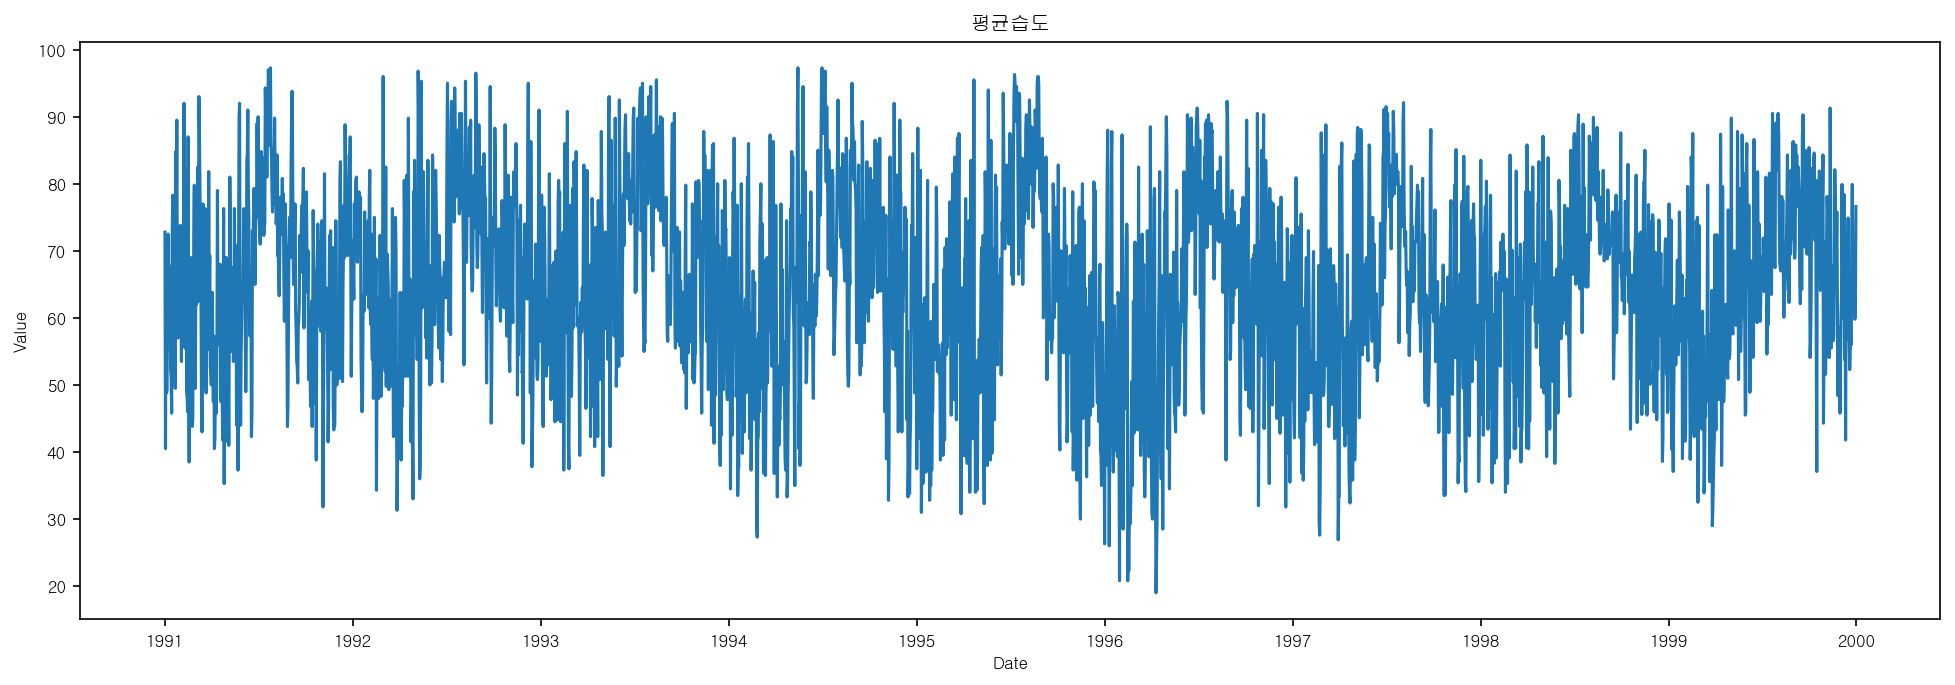

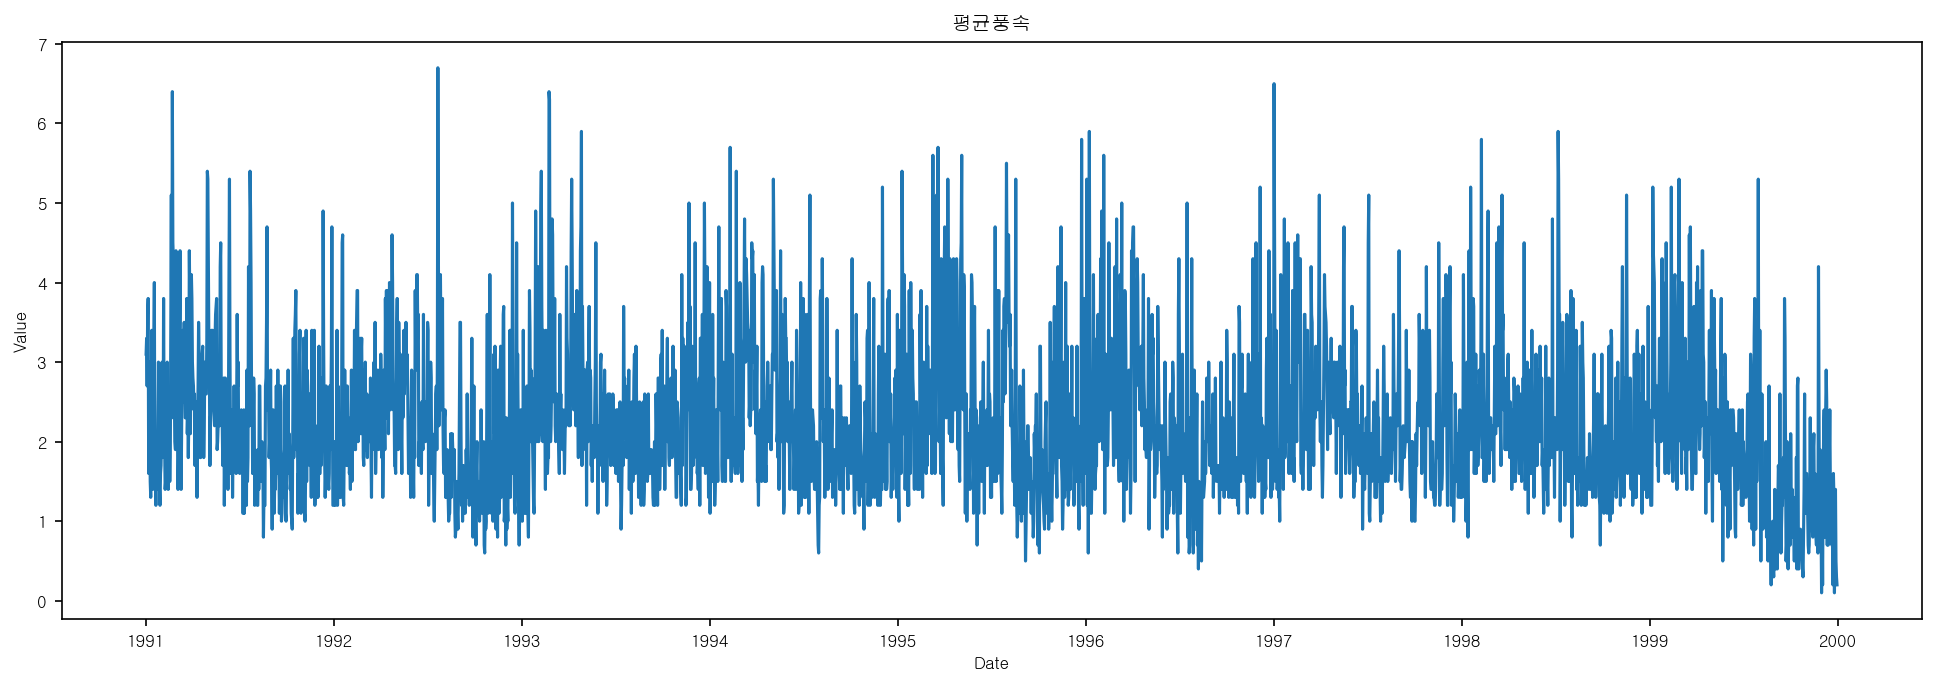

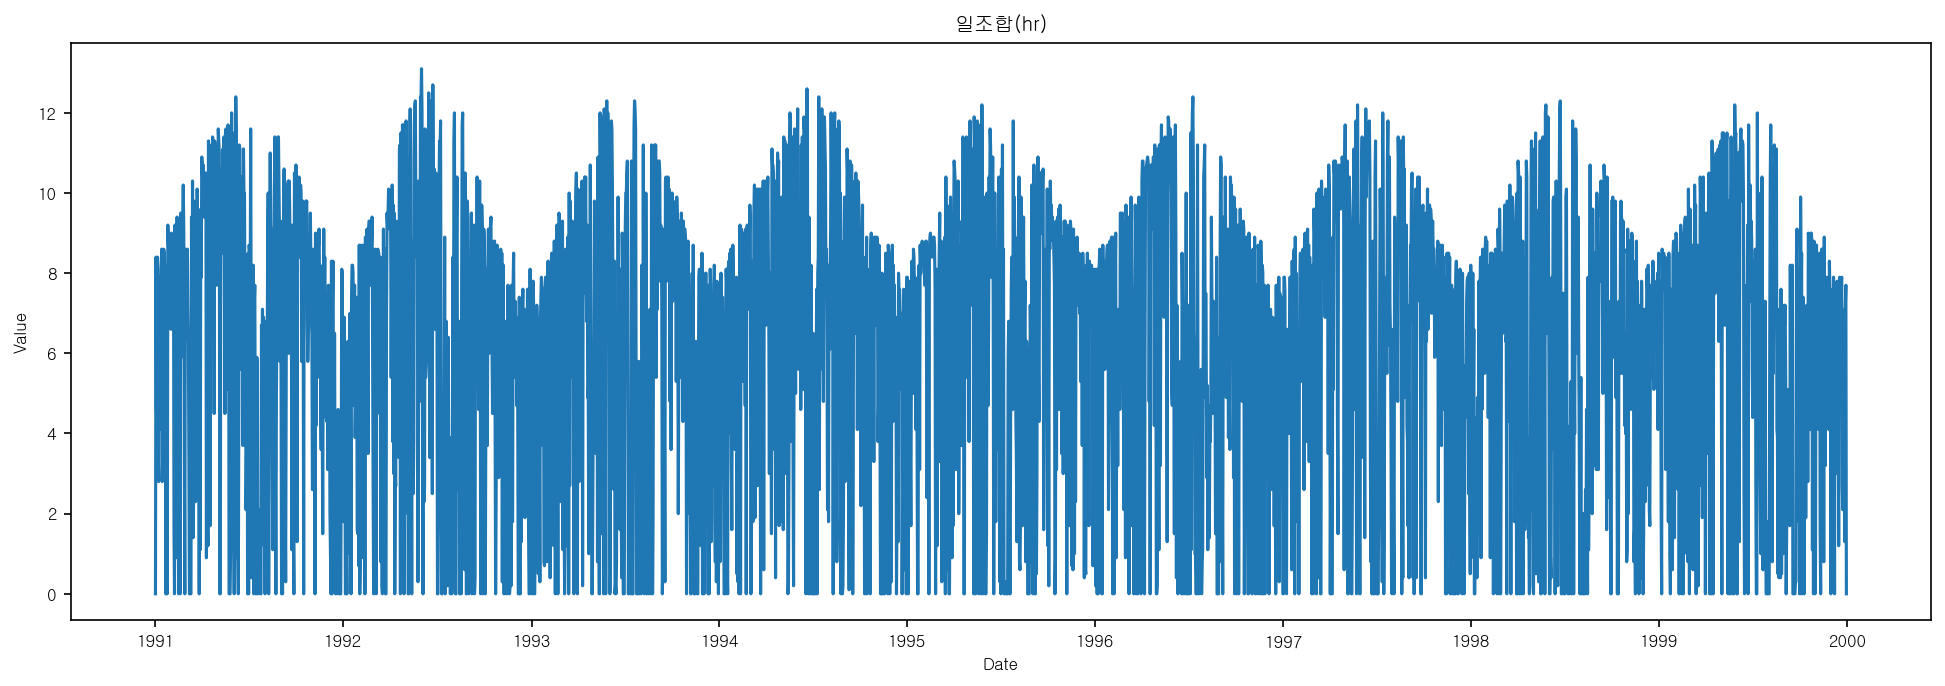

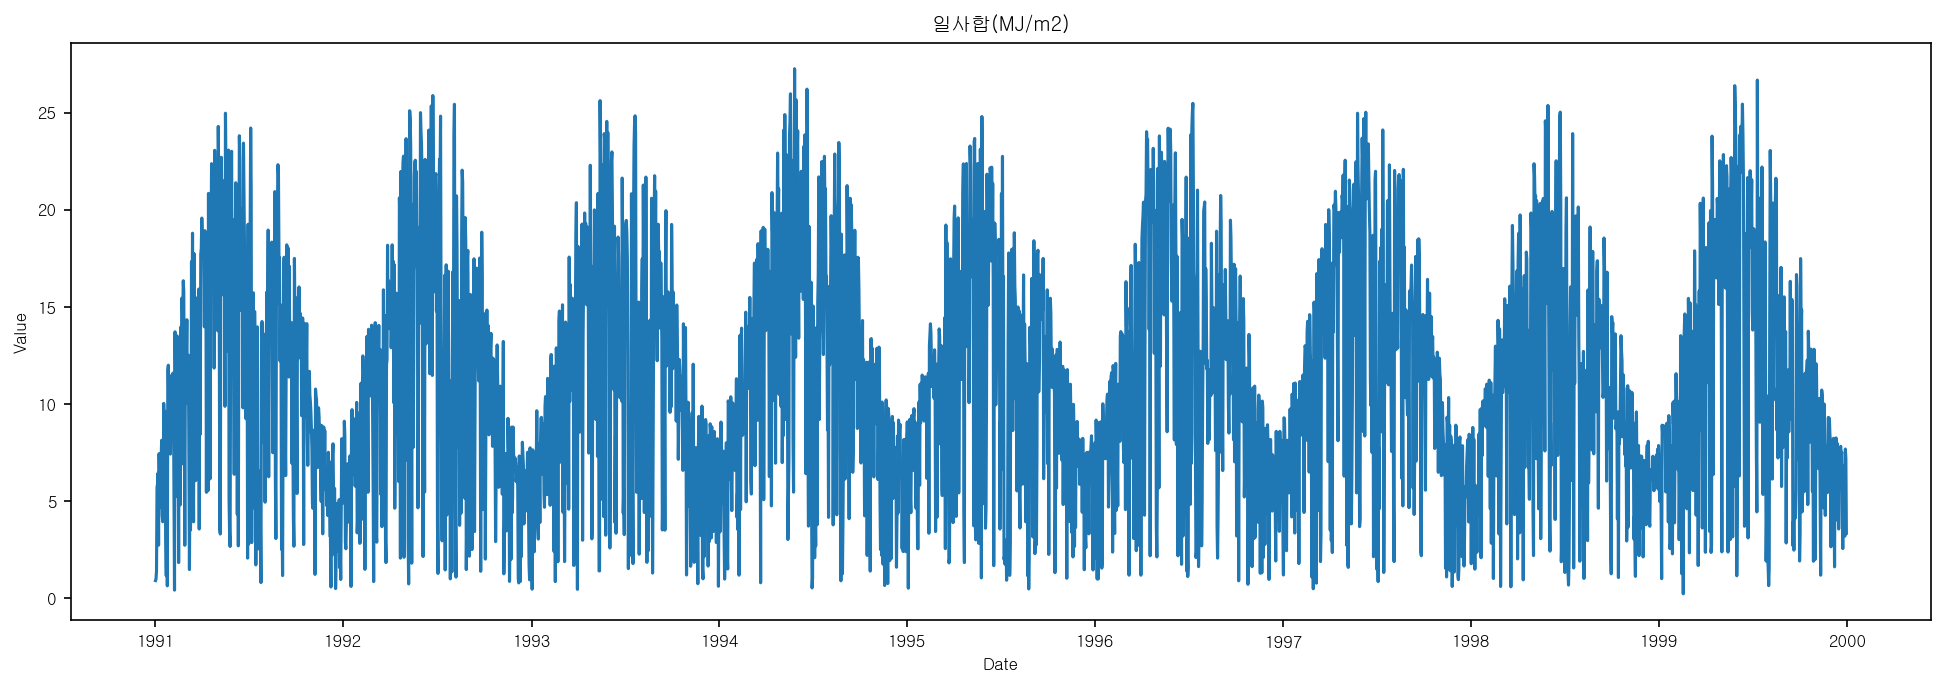

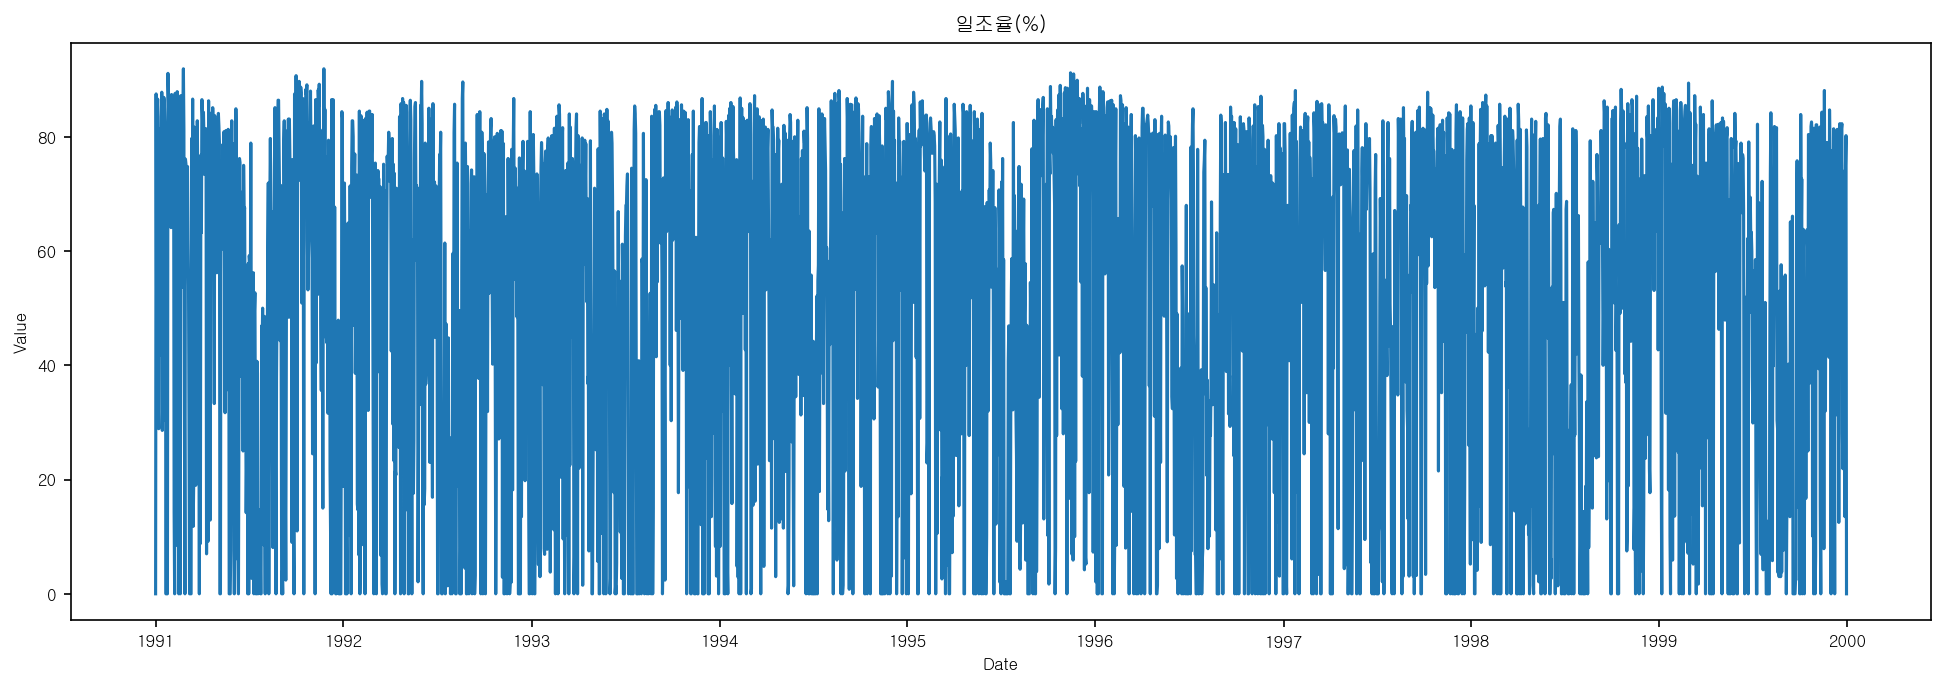

In [38]:
all_columns=['최고기온','최저기온','일교차','강수량','평균습도','평균풍속','일조합(hr)','일사합(MJ/m2)','일조율(%)']
nrows,ncols=3,3

def plot_df(x, y, xlabel='Date', ylabel='Value', dpi=150):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y)
    plt.title(columns)
    plt.gca().set(xlabel=xlabel, ylabel=ylabel)
    plt.show()

for index,columns in enumerate(all_columns):
    plot_df(x=df_1990s['일시'],y=df_1990s[columns])

# 다변량 시각화

- 산점도: 2개의 연속형 변수의 관계를 보기 위해 X축과 Y축에 표시하는 점들을 찍어 만드는 그래프 (상관관계를 대략적으로 파악)
- 히트맵: corr(), pcolor(), colorbar(), 칼럼 간의 상관관계
- 범주형 산점도(Categorical Plot): catplot(), 범주형 데이터와 수치형 데이터의 관계
- 선형 회귀 모델 그래프: lmplot(), 특성간의 선형적인 관계 파악 또한 이상치 데이터도 짐작 가능
- 빈도 그래프(count plot): sns.countplot(), 범주형 데이터에 대해 항목별 개수를 세어서 막대 그래프를 그림
- 조인트 그래프(joint plot): sns.jointplot(), 중앙에 산점도와 가장자리에 히스토그램을 동시에 그림, 데이터의 분포와 상관 관계

출처: AICE Associate 책

수치형 데이터 간의 관계를 파악해보자.

종속 관계 척도를 파악할 수 있는 Covariance(공분산)과 Correlation(상관관계) 계산해보자.

칼럼 의문점

1. 일교차 최고 기온과 최저 기온의 차인데, 최고 기온, 최저 기온, 일교차는 모델 관점에서 resource가 많이 들어가는게 아닌가?
2. 강수량과 평균습도, 강수량이 많으면 습도가 높은게 아닌가?
3.  일조합(hr): 태양 광선이 구름이나 안개로 가려지지 않고 땅 위를 비치는 것 

    일사합(MJ/m2):지표면에 도달한 태양복사에너지량 1분 동안 지표면에 복사되는 에너지의 양'

    일조율(%) : 실제 일조시간과 가조시간의 비율. 장애물 뿐만 아니라 날씨도 영향을 미친다
	
    - 일조시간 : 실제로 빛이 비친 시간. 보통 1일이나 한달 동안 비친 총 시간 수로 표시함.

    - 가조시간 : 장애물이 없을 때 어느 지점에 햇빛이 비칠 수 있는 시간. 즉, 일출부터 일몰까지의 시간.

In [10]:
df.describe()

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합(hr),일사합(MJ/m2),일조율(%),평균기온
count,23011,23008.000000,23008.000000,23007.000000,9150.000000,23011.000000,23007.000000,22893.000000,18149.000000,22645.000000,23011.000000
mean,1991-07-02 00:00:00,17.071714,8.451960,8.619277,9.593683,65.202851,2.380993,5.858826,11.933170,48.653526,12.415419
min,1960-01-01 00:00:00,-13.600000,-20.200000,1.000000,0.000000,17.900000,0.100000,0.000000,0.000000,0.000000,-16.400000
25%,1975-10-01 12:00:00,7.800000,-0.300000,6.600000,0.100000,54.900000,1.700000,2.200000,7.000000,17.800000,3.400000
50%,1991-07-02 00:00:00,18.900000,9.200000,8.600000,1.400000,65.500000,2.200000,6.600000,11.220000,55.700000,13.800000
75%,2007-04-01 12:00:00,26.400000,17.900000,10.600000,8.500000,75.800000,2.900000,9.000000,16.620000,78.000000,21.800000
max,2022-12-31 00:00:00,39.600000,30.300000,19.600000,332.800000,99.800000,7.800000,13.700000,33.480000,96.900000,33.700000
std,NaN,10.714471,10.578285,2.907096,21.966135,14.549077,0.947595,3.816941,6.419122,31.662321,10.489515
